In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv('movieTrain.csv')

In [3]:
pd.set_option("display.max_columns", 999)
#pd.set_option("display.max_rows", 999)

Lets look at revenue

In [4]:
df.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

C:\Users\bpere\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


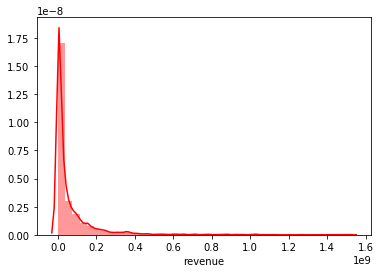

In [5]:
sns.distplot(df['revenue'],bins=40,color='r')

In [6]:
for ind, val in enumerate(df.revenue):
    if val == 1:
        print(ind)

347
1754
1874
1917


In [7]:
df.loc[347]

id                                                                     348
belongs_to_collection                                                  NaN
budget                                                                  12
genres                   [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...
homepage                                                               NaN
imdb_id                                                          tt0118172
original_language                                                       en
original_title                                     The Wind in the Willows
overview                 Jailed for his reckless driving, rambunctious ...
popularity                                                         1.41032
poster_path                               /nsOM52BsDeHzc0yI27bah2OWems.jpg
production_companies           [{'name': 'Allied Filmmakers', 'id': 1755}]
production_countries      [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
release_date             

these are defintely outliers the website is either missing info or it is being transferred incorrectly

In [8]:
list = []
for ind, val in enumerate(df.revenue):
    if val < 100000:
        list.append(ind)
# for i in list:
#     print(df.loc[i],'\n\n')
len(list)

232

In [9]:
#dropping movies with zero budget
list = []
list2 = []
for ind, val in enumerate(df.budget):
    if val == 0:
        list.append(ind)
dft = df.drop(list)
dft.reset_index(inplace=True, drop=True)
print('list of mives with zero budget',len(list))
for ind, val in enumerate(dft.revenue):
    if val < 100000:
        list2.append(ind)
print('list of mives with revenue less than 100k after dropping zero budget', len(list2))
dft.drop(list2,inplace=True)
dft.reset_index(inplace=True, drop=True)

list of mives with zero budget 812
list of mives with revenue less than 100k after dropping zero budget 89


i have to thrown out all the ones with no budget becasuse it is an important feature and it is wrong  
I also dropped all the movies with revenue under 100k becasue this  just sounds wrong

## Initial feature selection and extraction

In [10]:
dft.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638


possible ideas:  
how mny words in title  
gender of lead role  

In [11]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 23 columns):
id                       2099 non-null int64
belongs_to_collection    490 non-null object
budget                   2099 non-null int64
genres                   2095 non-null object
homepage                 752 non-null object
imdb_id                  2099 non-null object
original_language        2099 non-null object
original_title           2099 non-null object
overview                 2095 non-null object
popularity               2099 non-null float64
poster_path              2099 non-null object
production_companies     2042 non-null object
production_countries     2085 non-null object
release_date             2099 non-null object
runtime                  2099 non-null float64
spoken_languages         2096 non-null object
status                   2099 non-null object
tagline                  1827 non-null object
title                    2099 non-null object
Keywords             

In [12]:
dft.status.unique()

array(['Released', 'Rumored'], dtype=object)

In [13]:
for i in range(len(dft.status)):
    if dft.status[i] == 'Rumored':
        print(dft.revenue[i])

229000


I am going to drop some things:  
    id: irrelevant,    
    poster path: irrelevant,  
    status: seems to be wrong,  
    imbd id: irrelevant,  
    overview: irrelevant  
    title: irrelevant but will drop later
    oringinal title: irrelevant

In [14]:
df1 = dft.drop(['id','poster_path','status','imdb_id','overview','original_title','Keywords'], axis=1)
#df1.head()

I am going to start creating some dummy varibales for belongs to collection

In [15]:
df1.belongs_to_collection.fillna(0,inplace=True)
collect = []
for i in range(len(df1.belongs_to_collection)):
    if df1.belongs_to_collection[i] == 0:
        collect.append(0)
    else:
        collect.append(1)
df1['belongs_to_collection1'] = collect
df1.drop('belongs_to_collection',axis=1,inplace=True)

now for homepage

In [16]:
df1.homepage.fillna(0,inplace=True)
home = []
for i in range(len(df1.homepage)):
    if df1.homepage[i] == 0:
       home.append(0)
    else:
        home.append(1)
df1['homepage1'] = home
df1.drop('homepage',axis=1,inplace=True)


tagline

In [17]:
df1.tagline.fillna(0,inplace=True)
tag = []
for i in range(len(df1.tagline)):
    if df1.tagline[i] == 0:
        tag.append(0)
    else:
        tag.append(1)
df1['tagline1'] = tag
df1.drop('tagline',axis=1,inplace=True)

Now for the language

In [18]:
df1['original_language1'] = pd.factorize(df1.original_language)[0]
df1.drop('original_language',axis=1,inplace=True)

there is still some NaN but I will drop all, because there are very few

In [19]:
df2=df1.dropna(how='any')
df2.reset_index(inplace=True, drop=True)


Now for genres, I am only loking at first 2 genres and concateneating them into a unique string which I will use as a dummy variable

In [20]:
#gets a inique value for first 2 genres
gen = []
for i in range(len(df2.genres)):
    genre1 = df2.genres[i][8:10]
    t = df2.genres[i].find("'id'",8)
    if t != -1:
        genre2 = df2.genres[i][t+6:t+8]
        if genre2 == genre1:
            gen.append(genre1)
        else:
            gen.append(genre1+genre2)
    else:
        gen.append(genre1)

In [21]:
dft = pd.DataFrame(gen, columns=["genre1"])
df2['genres1'] = pd.factorize(dft.genre1)[0]
df2.drop('genres',axis=1,inplace=True)

C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bpere\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Now release date, perhps encode season(1,2,3,4), and year maybe subtract form min so we dont have huge numbers, binary encode whther it was relesed on a holiday


In [22]:
month = []
year = []
for i in range(len(df2.spoken_languages)):
    a = df2.release_date[i]
    b = a.find('/')
    c = a.find('/',b+1)
    d = float(a[c+1:])
    if d<=19:
        e = '20' + a[c+1:]
    else:
        e = '19' + a[c+1:]
    year.append(float(e))
    month.append(float(a[:b]))

In [23]:
release_year = []
for i in year:
    release_year.append(i-1921.)
release_month = []
for i in month:
    if i <= 3:
        release_month.append(0)
    elif i>3 and i<=6:
        release_month.append(1)
    elif i>6 and i<=9:
        release_month.append(2)
    else:
        release_month.append(3)

In [24]:
df2['release_month'] = release_month
df2['release_year'] = release_year
df2.drop('release_date', axis=1, inplace=True)

C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now for porduction country, I will only look at first country and encode it

In [25]:
prod_country = []
for i in range(len(df2.production_countries)):
    a = df2.production_countries[i]
    b = a.find(': ')
    prod_country.append(a[b+3:b+5])

In [26]:
df2['production_country1'] = prod_country
df2['prod_country'] = pd.factorize(df2.production_country1)[0]
df2.drop('production_country1',axis=1,inplace=True)
df2.drop('production_countries', axis=1, inplace=True)

C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


now for production companies, I will encode the first company only

In [27]:
prod_com = []
for i in range(len(df2.production_companies)):
    a = df2.production_companies[i]
    b = a.find('name')
    c = a.find('id')
    prod_com.append(a[b+7:c-4])


In [28]:
df2['production_comp'] = prod_com
df2['production_company'] = pd.factorize(df2.production_comp)[0]
df2.drop('production_comp',axis=1,inplace=True)
df2.drop('production_companies',axis=1,inplace=True)

C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


now for spoken language, i will make it a binary variable 0 for one language and 1 for multiple languages

In [29]:
lang = []
for i in range(len(df2.spoken_languages)):
    a = df2.spoken_languages[i].count('name')
    if a == 1:
        lang.append(0)
    else:
        lang.append(1)
df2['spoken_lang'] = lang
df2.drop('spoken_languages',axis=1,inplace=True)

C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## intial visulaization

In [30]:
df2.insert(0,'revenue1',df2.revenue)

In [31]:
df2.drop('revenue',axis=1, inplace=True)

In [32]:
df2.head()

,revenue1,budget,popularity,runtime,title,cast,crew,belongs_to_collection1,homepage1,tagline1,original_language1,genres1,release_month,release_year,prod_country,production_company,spoken_lang
0,12314651,14000000,6.575393,93.0,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",1,0,1,0,0,0,94.0,0,0,0
1,95149435,40000000,8.248895,113.0,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",1,0,1,0,1,2,83.0,0,1,0
2,13092000,3300000,64.299990,105.0,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",0,1,1,0,2,3,93.0,0,2,0
3,85446075,14000000,7.286477,92.0,The Possession,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",0,1,1,0,3,2,91.0,0,3,0
4,18750246,6000000,4.672036,91.0,A Mighty Wind,"[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",0,0,1,0,4,1,82.0,0,4,0


In [33]:
corrmap = df2.drop(['title','cast','crew'],axis=1).corr()
corrmap

,revenue1,budget,popularity,runtime,belongs_to_collection1,homepage1,tagline1,original_language1,genres1,release_month,release_year,prod_country,production_company,spoken_lang
revenue1,1.000000,0.730151,0.436890,0.191046,0.347400,0.266294,0.136086,-0.108880,0.028754,-0.005209,0.167527,-0.078864,-0.177568,0.017891
budget,0.730151,1.000000,0.298228,0.204673,0.211647,0.237832,0.161900,-0.146265,0.038586,0.001604,0.264380,-0.071844,-0.215846,0.042239
popularity,0.436890,0.298228,1.000000,0.103347,0.132752,0.161799,0.122700,-0.086615,0.055744,-0.014980,0.126222,-0.064411,-0.094936,-0.014466
runtime,0.191046,0.204673,0.103347,1.000000,-0.075321,0.018083,-0.055140,0.036345,0.006058,0.106800,-0.037619,0.110806,0.003947,0.121146
belongs_to_collection1,0.347400,0.211647,0.132752,-0.075321,1.000000,0.057618,0.088188,-0.015321,0.041672,-0.049626,-0.031201,-0.032682,-0.074602,0.000908
homepage1,0.266294,0.237832,0.161799,0.018083,0.057618,1.000000,0.058268,0.028340,0.061992,-0.039274,0.390751,0.040487,0.011634,0.027002
tagline1,0.136086,0.161900,0.122700,-0.055140,0.088188,0.058268,1.000000,-0.245497,0.028772,-0.062489,-0.065658,-0.244379,-0.211829,-0.006381
original_language1,-0.108880,-0.146265,-0.086615,0.036345,-0.015321,0.028340,-0.245497,1.000000,0.025611,-0.039293,0.122975,0.511903,0.247797,0.069909
genres1,0.028754,0.038586,0.055744,0.006058,0.041672,0.061992,0.028772,0.025611,1.000000,-0.012654,0.010826,0.071603,0.036601,0.027527
release_month,-0.005209,0.001604,-0.014980,0.106800,-0.049626,-0.039274,-0.062489,-0.039293,-0.012654,1.000000,-0.077997,-0.016404,-0.013417,0.051500


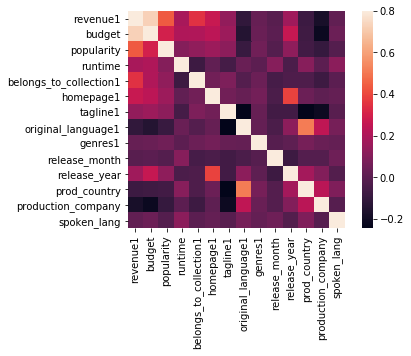

In [34]:
sns.heatmap(corrmap, vmax=.8, square=True)

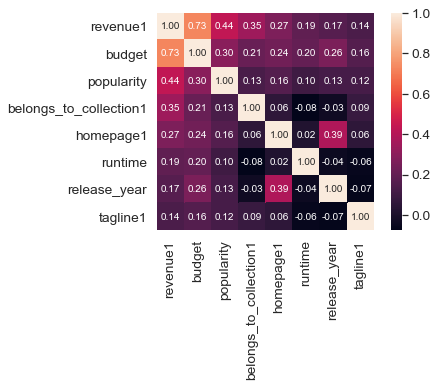

In [35]:
k = 8 #number of variables for heatmap
cols = corrmap.nlargest(k, 'revenue1')['revenue1'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
cols

Index(['revenue1', 'budget', 'popularity', 'belongs_to_collection1',
       'homepage1', 'runtime', 'release_year', 'tagline1'],
      dtype='object')

C:\Users\bpere\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


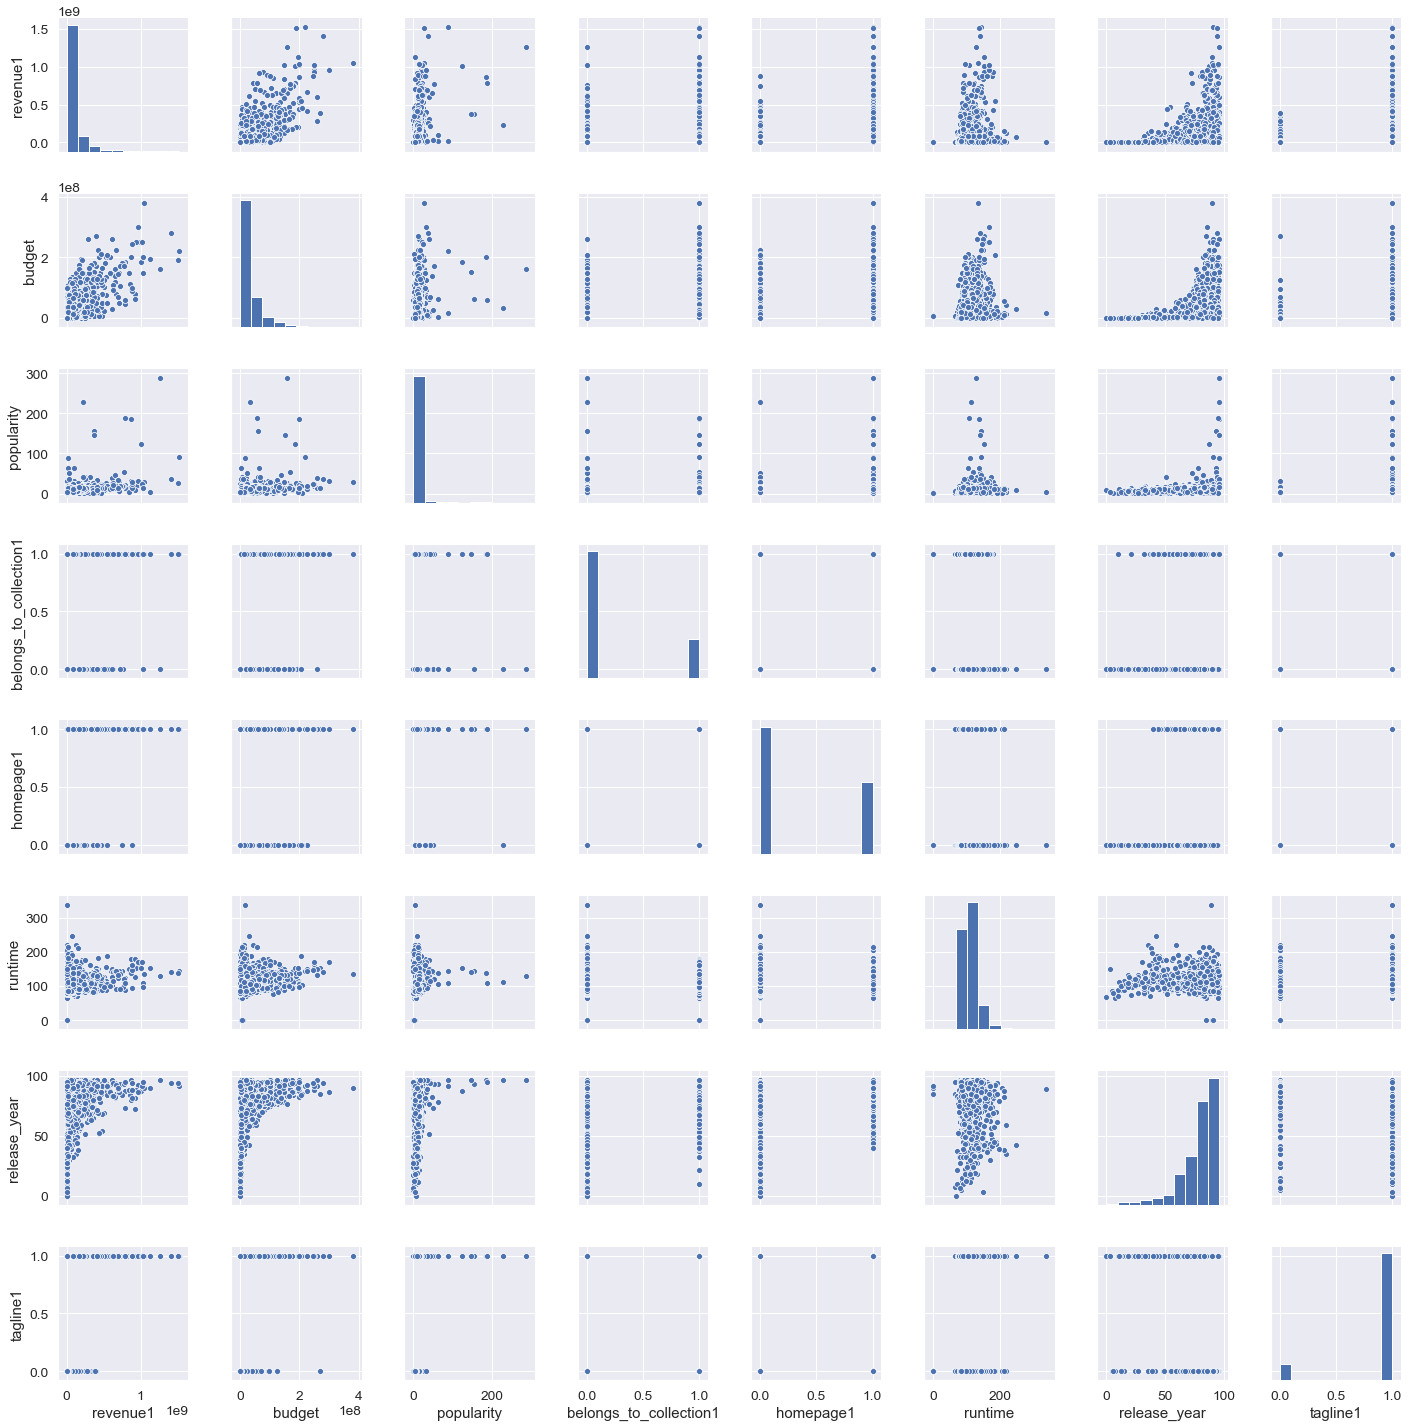

In [37]:
sns.pairplot(df2[cols], size = 2.5)
plt.show();

## PCA

In [38]:
#split data
X = df2.drop(['title','cast','crew','revenue1'],axis=1)
y = df2.revenue1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [39]:
#scale data
sc = StandardScaler()
sc.fit(X_train)
scX = sc.transform(X_train)
col = X.columns
dfscaled = pd.DataFrame(scX,columns=col)
dfscaled.head()

C:\Users\bpere\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bpere\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,budget,popularity,runtime,belongs_to_collection1,homepage1,tagline1,original_language1,genres1,release_month,release_year,prod_country,production_company,spoken_lang
0,0.046412,0.164937,0.746755,-0.553135,-0.768242,0.363168,-0.252081,-0.683404,-1.459633,-0.200513,-0.490067,-0.591638,1.445519
1,-0.120907,-0.319641,-0.911553,-0.553135,-0.768242,0.363168,-0.252081,-0.814698,1.257496,0.053773,-0.490067,-0.654126,-0.691793
2,0.165926,0.188749,0.164107,-0.553135,-0.768242,0.363168,-0.252081,-0.814698,1.257496,0.053773,-0.490067,-0.820758,-0.691793
3,-0.730427,-0.655774,-1.180468,-0.553135,1.301673,0.363168,-0.252081,-0.945992,-1.459633,1.007344,-0.490067,1.272564,-0.691793
4,1.241549,0.091455,0.119287,-0.553135,-0.768242,0.363168,-0.252081,1.975296,1.257496,-0.136941,1.093089,-0.742649,-0.691793


In [40]:
pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)
a=np.cumsum(pca.explained_variance_ratio_)

[1.00000000e+00 2.00427897e-11 5.27846993e-13 2.74007040e-13
 1.29663722e-13 9.22846852e-14 2.51259233e-14 3.59441741e-15
 6.86842552e-16 1.23336408e-16 1.08786207e-16 9.28337785e-17
 5.15141045e-17]


In [41]:
sortPCA = np.sort(pca.components_[0])
revSort = sortPCA[::-1]
pc1 = pd.Series(revSort, index=X.columns)
pc1

budget                    1.000000e+00
popularity                1.113243e-07
runtime                   9.986580e-08
belongs_to_collection1    9.081689e-08
homepage1                 2.876751e-08
tagline1                  2.697123e-09
original_language1        2.417434e-09
genres1                   1.273259e-09
release_month             3.717856e-10
release_year              8.125276e-11
prod_country             -1.029524e-08
production_company       -1.075854e-08
spoken_lang              -1.017369e-06
dtype: float64

In [42]:
sortPCA = np.sort(pca.components_[1])
revSort = sortPCA[::-1]
pc2 = pd.Series(revSort, index=X.columns)
pc2

budget                    0.999815
popularity                0.011316
runtime                   0.009972
belongs_to_collection1    0.009118
homepage1                 0.006176
tagline1                  0.003411
original_language1        0.000128
genres1                   0.000001
release_month            -0.000003
release_year             -0.000024
prod_country             -0.000083
production_company       -0.000293
spoken_lang              -0.003071
dtype: float64